# CREDIR CARD FRAUD DETECTION

## Importing Data

In [45]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2)

In [2]:
df = pd.read_csv('datasets/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

Normalizing the 'amount' column :

In [7]:
df['NormalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop('Amount',axis=1)
df = df.drop('Time',axis=1) # we don't need the 'Time' column for the moment

In [8]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Splitting the dataset

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [13]:
X_train.shape

(199364, 29)

In [14]:
X_test.shape

(85443, 29)

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

- Activation function 1 - **Step function**: We are using a step function here whichs returns 0 for any negative value and 1 for any positive value for the percepton outputs.
- Activation function 2 - **Sigmoid function**: Same as the step function but softer change from 0 to 1, and takes into account probabilities.
- Activation function 3 - **RELU function**: Returns 0 for negative values and returns the value itself for any positive value.

Here we will focus on the Sigmoid function and the RELU function.

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [24]:
model = Sequential([# our model is Sequential meaning that one layer comes after the other
    # This is why we use Dense layers first, then a Dropout layer to avoid overfitting (we drop layers with data 
    # that make our model overfit) and Dense layers again to finish
    Dense(units=16, input_dim = 29,activation='relu'), # units = number of nodes & input dimension is equal to the number of columns
    Dense(units=24, activation='relu'),
    Dropout(0.5), # 0.5 probability of dropping each node
    Dense(units=20 ,activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid'), # here we use the sigmoid function as we are solving a classification problem
]) 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

### Training

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0101 - accuracy: 0.9978
Epoch 2/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 18s 1ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 18s 1ms/step - loss: 0.0033 - accuracy: 0.9993


### Evaluation of the model

In [27]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 3s 918us/step - loss: 0.0036 - accuracy: 0.99940s - loss: 0.0032 - accu


In [28]:
print(score)

[0.003552869660779834, 0.9993796944618225]


In [48]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [59]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [60]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [61]:
print(cnf_matrix)

[[85274    22]
 [   31   116]]


Confusion matrix, without normalization
[[85274    22]
 [   31   116]]


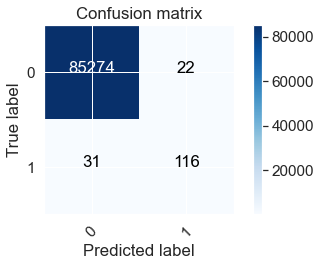

In [63]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

#### Let's use the same model on the whole dataset not only the sample used previously

Confusion matrix, without normalization
[[284234     81]
 [    94    398]]


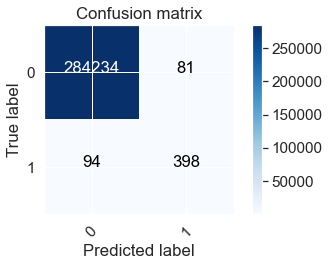

In [64]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
random_forest = RandomForestClassifier(n_estimators=100)

In [68]:
random_forest.fit(X_train,y_train.ravel())

RandomForestClassifier()

In [69]:
y_pred = random_forest.predict(X_test)

In [70]:
random_forest.score(X_test,y_test)

0.9995435553526912

### Evaluation of the model

In [71]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [72]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


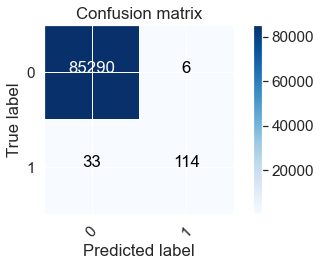

In [73]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

#### Let's use the same model on the whole dataset not only the sample used previously

In [75]:
y_pred = random_forest.predict(X)

In [76]:
cnf_matrix = confusion_matrix(y,y_pred.round())

Confusion matrix, without normalization
[[284309      6]
 [    34    458]]


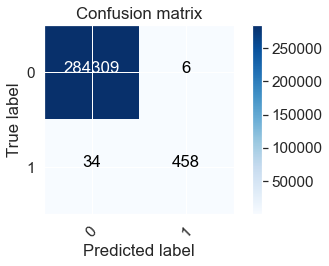

In [77]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## Decision Trees

In [78]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [79]:
decision_tree.fit(X_train,y_train.ravel())

DecisionTreeClassifier()

In [80]:
y_pred = decision_tree.predict(X_test)

In [81]:
decision_tree.score(X_test,y_test)

0.9992392589211521

### Evaluation of the model

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [83]:
y_pred = decision_tree.predict(X)

In [84]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284286     29]
 [    36    456]]


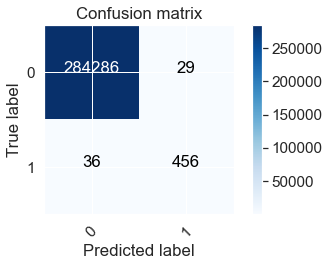

In [85]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## Sampling

### Undersampling

In [87]:
fraud_indices = np.array(df[df.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [93]:
normal_indices = df[df.Class == 0].index

In [94]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
print(len(random_normal_indices))

492


In [97]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [101]:
under_sample_data = df.iloc[under_sample_indices,:]
under_sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [103]:
X_undersample = under_sample_data.drop('Class', axis=1)
y_undersample = under_sample_data['Class']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [105]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [107]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 1ms/step - loss: 0.4044 - accuracy: 0.8939
Epoch 2/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1986 - accuracy: 0.9230
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9331
Epoch 4/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9390
Epoch 5/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.9375


### Model evaluation

Confusion matrix, without normalization
[[161   1]
 [ 12 122]]


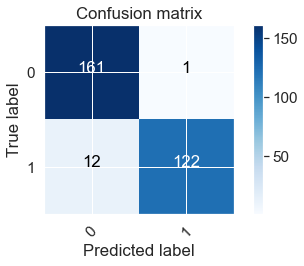

In [108]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

#### Let's use the same model on the whole dataset not only the undersample

Confusion matrix, without normalization
[[283820    495]
 [    50    442]]


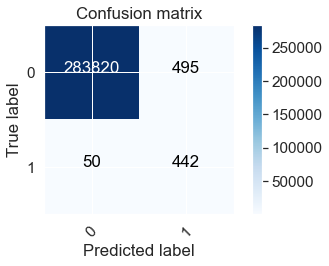

In [109]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## SMOTE (Oversampling)

In [111]:
from imblearn.over_sampling import SMOTE

In [114]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [115]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [117]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [118]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 37s 1ms/step - loss: 0.0292 - accuracy: 0.9895
Epoch 2/5
26537/26537 [==============================] - 33s 1ms/step - loss: 0.0132 - accuracy: 0.9964
Epoch 3/5
26537/26537 [==============================] - 35s 1ms/step - loss: 0.0111 - accuracy: 0.9972
Epoch 4/5
26537/26537 [==============================] - 38s 1ms/step - loss: 0.0093 - accuracy: 0.9977
Epoch 5/5
26537/26537 [==============================] - 36s 1ms/step - loss: 0.0082 - accuracy: 0.9980


### Evaluation of the model

Confusion matrix, without normalization
[[84836   293]
 [    6 85454]]


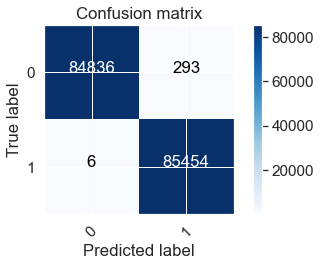

In [119]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

#### Let's use the same model on the whole dataset not only the sample used above

Confusion matrix, without normalization
[[283418    897]
 [     1    491]]


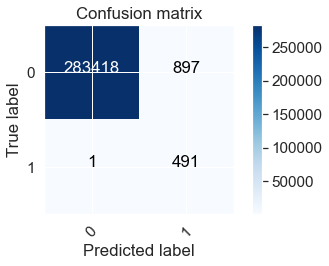

In [120]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()